### Data Science Assessment Data Usage/ Visualisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Initial EDA of dataset


In [2]:
# import dataset
dataset = pd.read_csv('Datasets/Diabetes-Dataset-Cleaned-2.csv')

# display information about the dataset
dataset.info()

# Display the first 5 rows of the dataset
dataset.head()

# Display the last 5 rows of the dataset
dataset.tail()

# Statistical Summary

# Display a summary of the dataset
print("\n Summary of the dataset:")
print(dataset.describe())

# Calculate and display the mean of each column
print("\nMean of each column:")
print(dataset.mean())

# Calculate and display the median of each column
print("\nMedian of each column:")
print(dataset.median())

# Calculate and display the standard deviation of each column
print("\nStandard Deviation of each column:")
print(dataset.std())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   float64
 2   BloodPressure             2768 non-null   float64
 3   BMI                       2768 non-null   float64
 4   DiabetesPedigreeFunction  2768 non-null   float64
 5   Age                       2768 non-null   int64  
 6   Outcome                   2768 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 151.5 KB

 Summary of the dataset:
       Pregnancies      Glucose  BloodPressure          BMI  \
count  2768.000000  2768.000000    2768.000000  2768.000000   
mean      3.742775   121.895273      72.404086    32.596665   
std       3.323801    30.500960      11.988255     7.103424   
min       0.000000    44.000000      24.000000    18.200000   
25%   

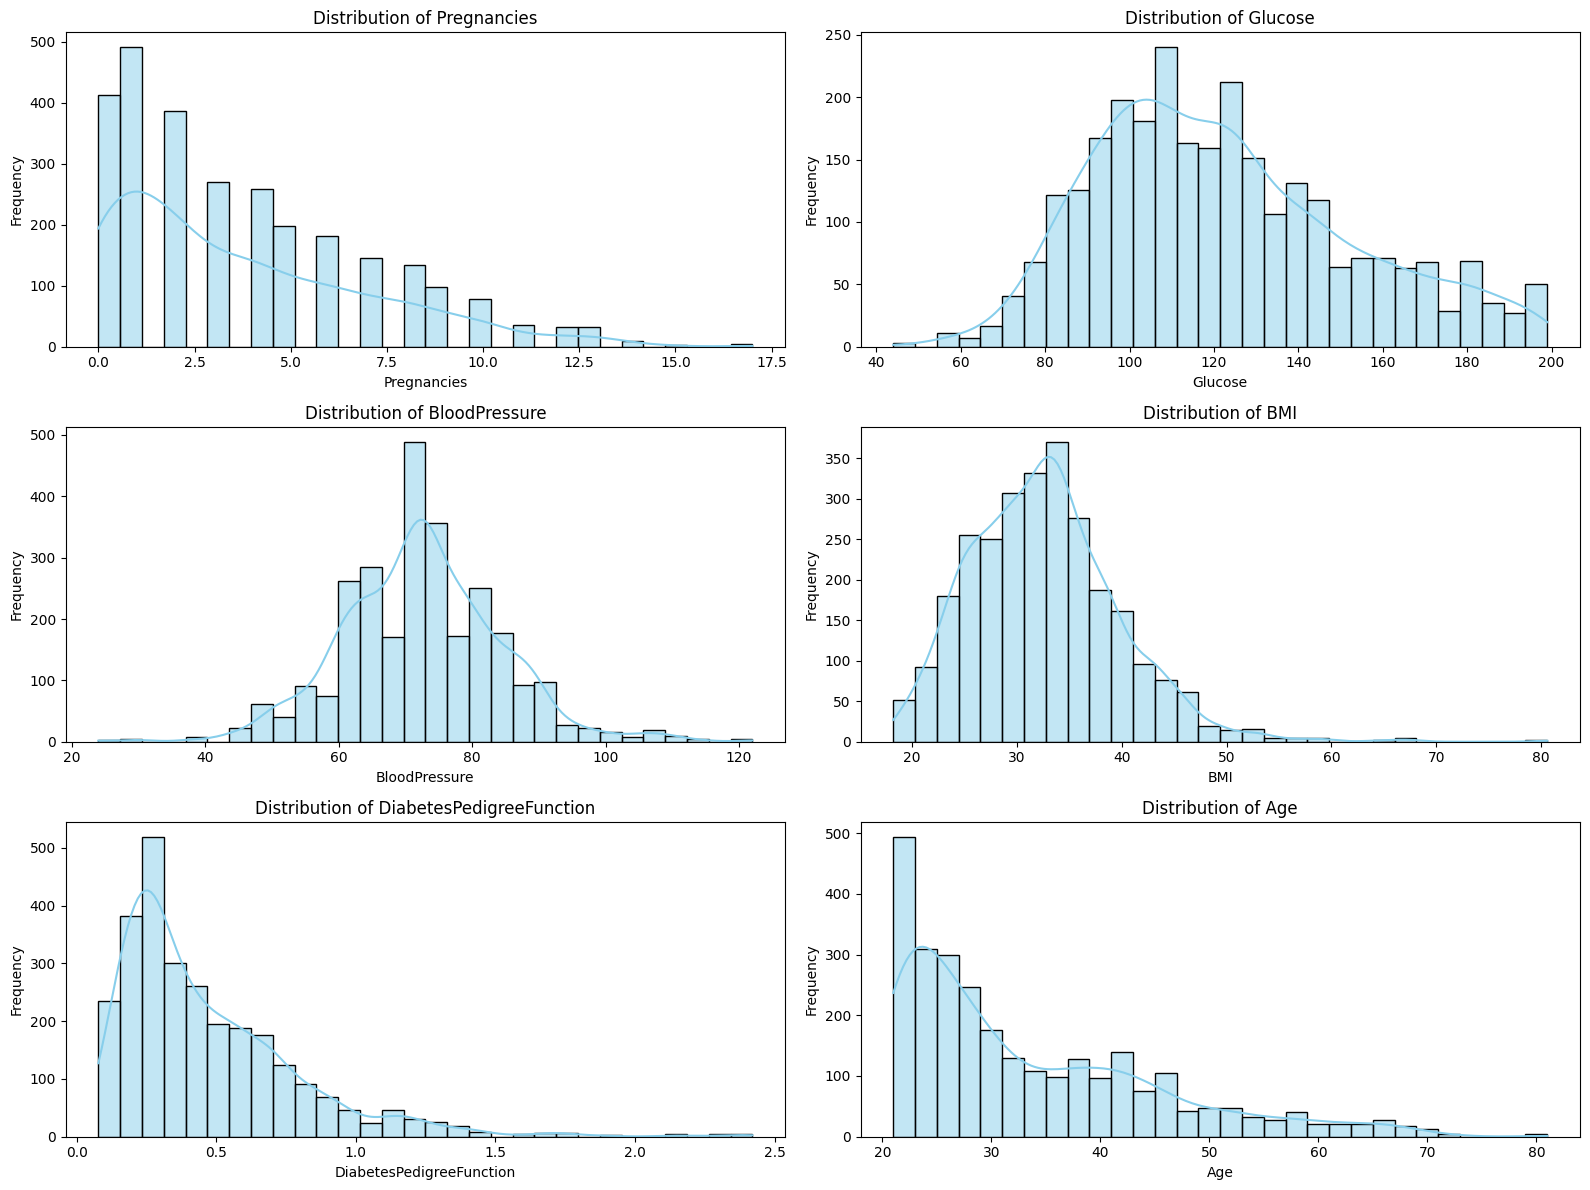

In [3]:
numerical_features = ["Pregnancies", "Glucose", "BloodPressure", "BMI", "DiabetesPedigreeFunction", "Age"]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(dataset[feature], bins=30, kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Initial Visualisation of Data

Outcome
0    65.606936
1    34.393064
Name: proportion, dtype: float64
         Pregnancies     Glucose  BloodPressure        BMI  \
Outcome                                                      
0           3.204295  111.090833      70.910400  31.105279   
1           4.769958  142.505422      75.253387  35.441579   

         DiabetesPedigreeFunction        Age  
Outcome                                       
0                        0.433316  31.111233  
1                        0.543445  36.987395  


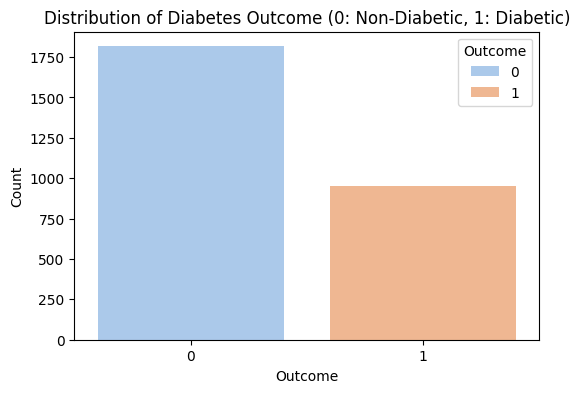

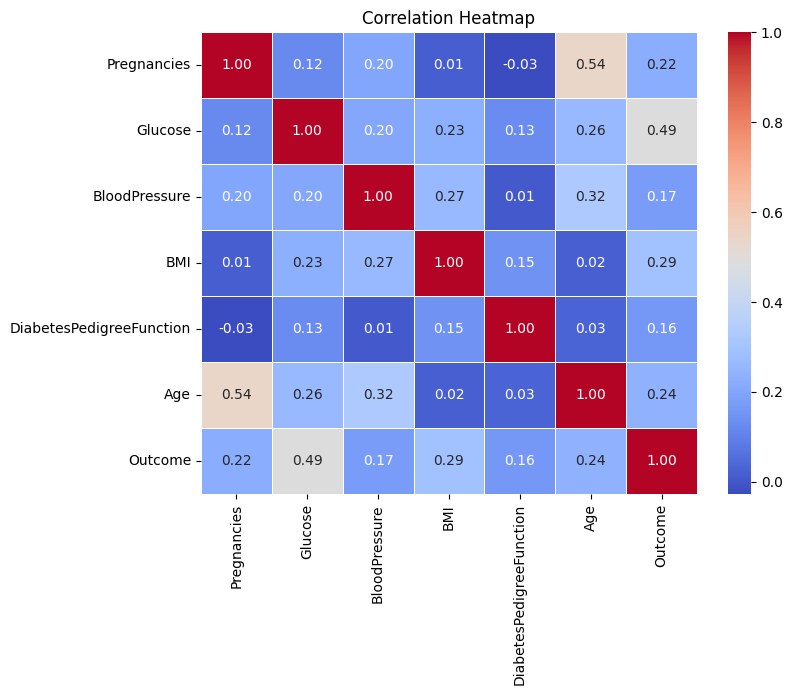

In [4]:

# Outcome distribution
outcome_distribution = dataset['Outcome'].value_counts(normalize=True) * 100
print(outcome_distribution)




# Grouped averages by Outcome
grouped_means = dataset.groupby('Outcome').mean()
print(grouped_means)


# 2. Outcome distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=dataset, hue='Outcome', palette='pastel')
plt.title('Distribution of Diabetes Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()





From the code above, we can see from the correlation heatmap that variables such as glucose, BMI and Age have a larger Correlation with the Outcome variables (To either have Diabetes or not). This gives us a good marker of what features we could do further analysis on

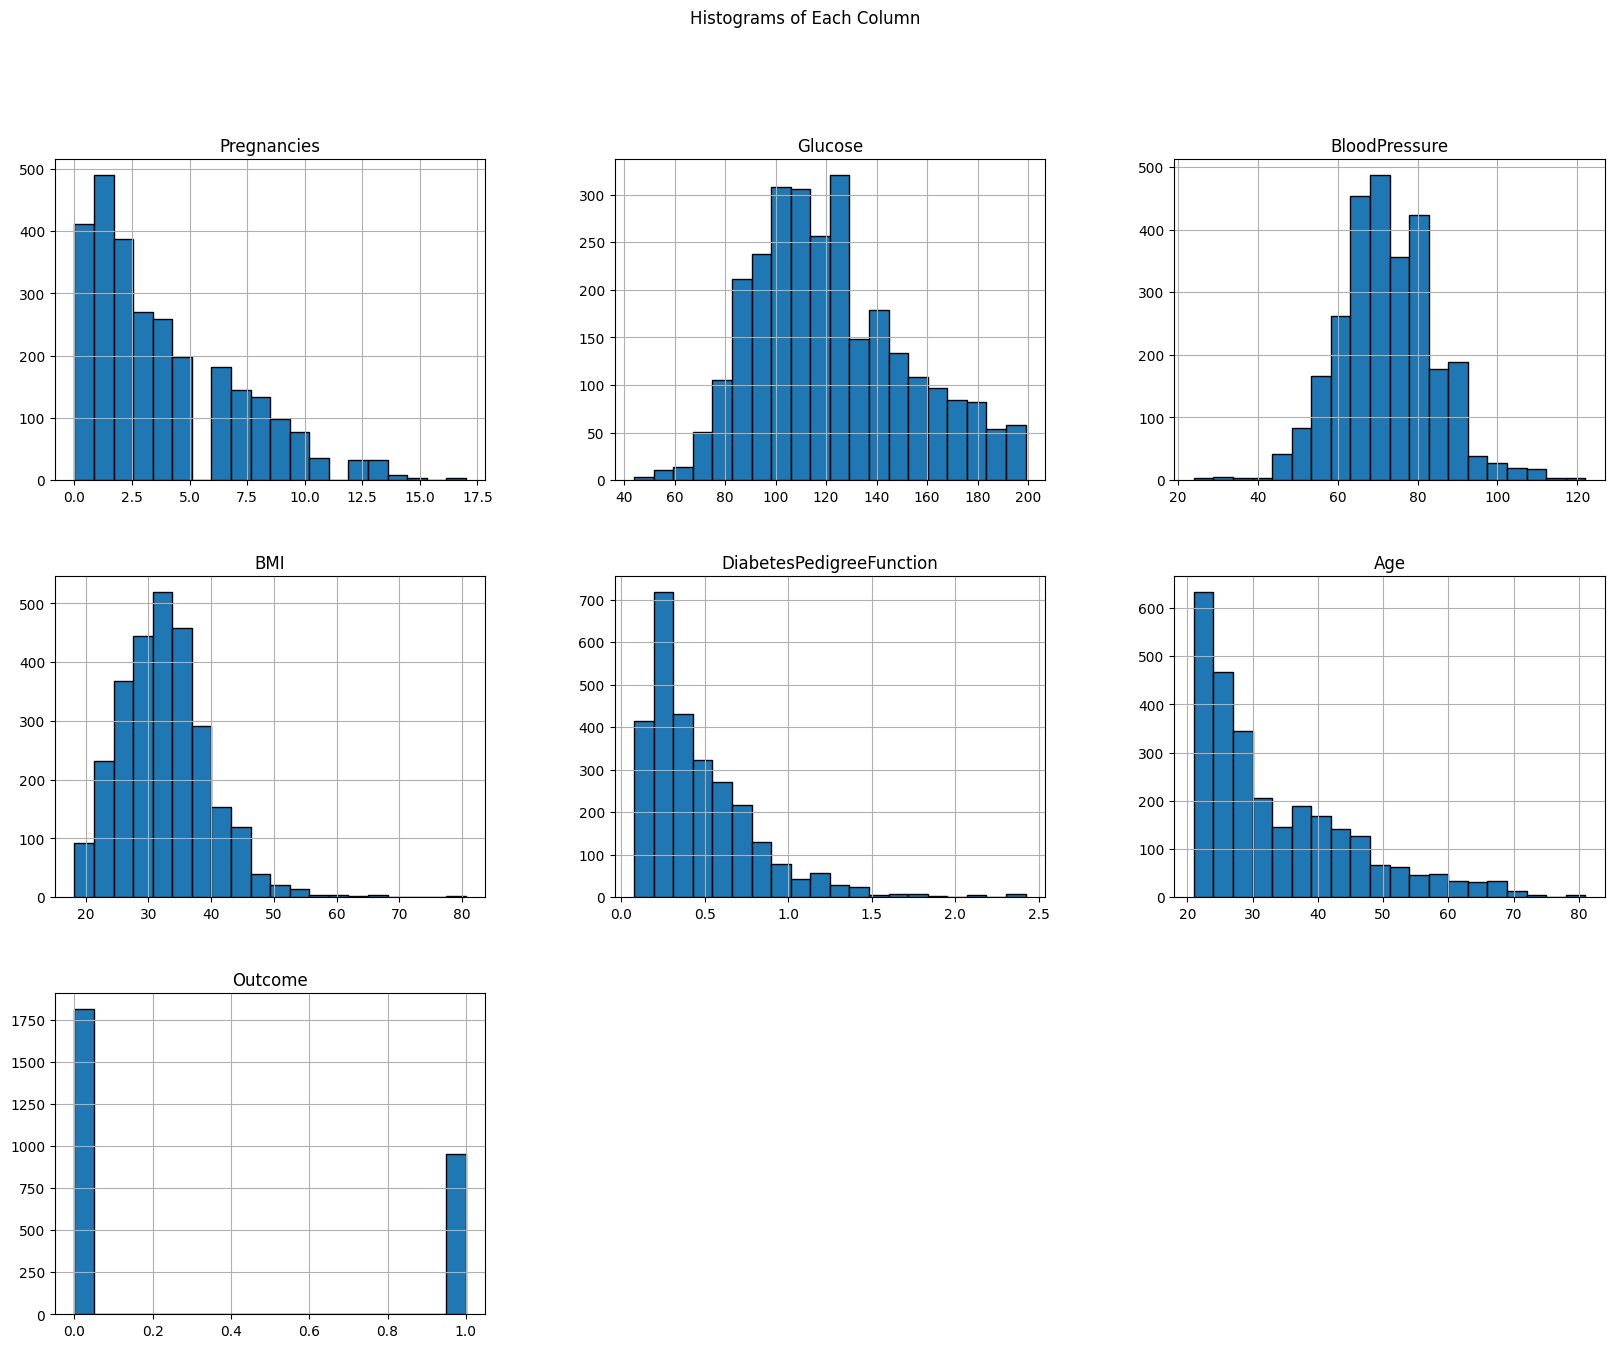

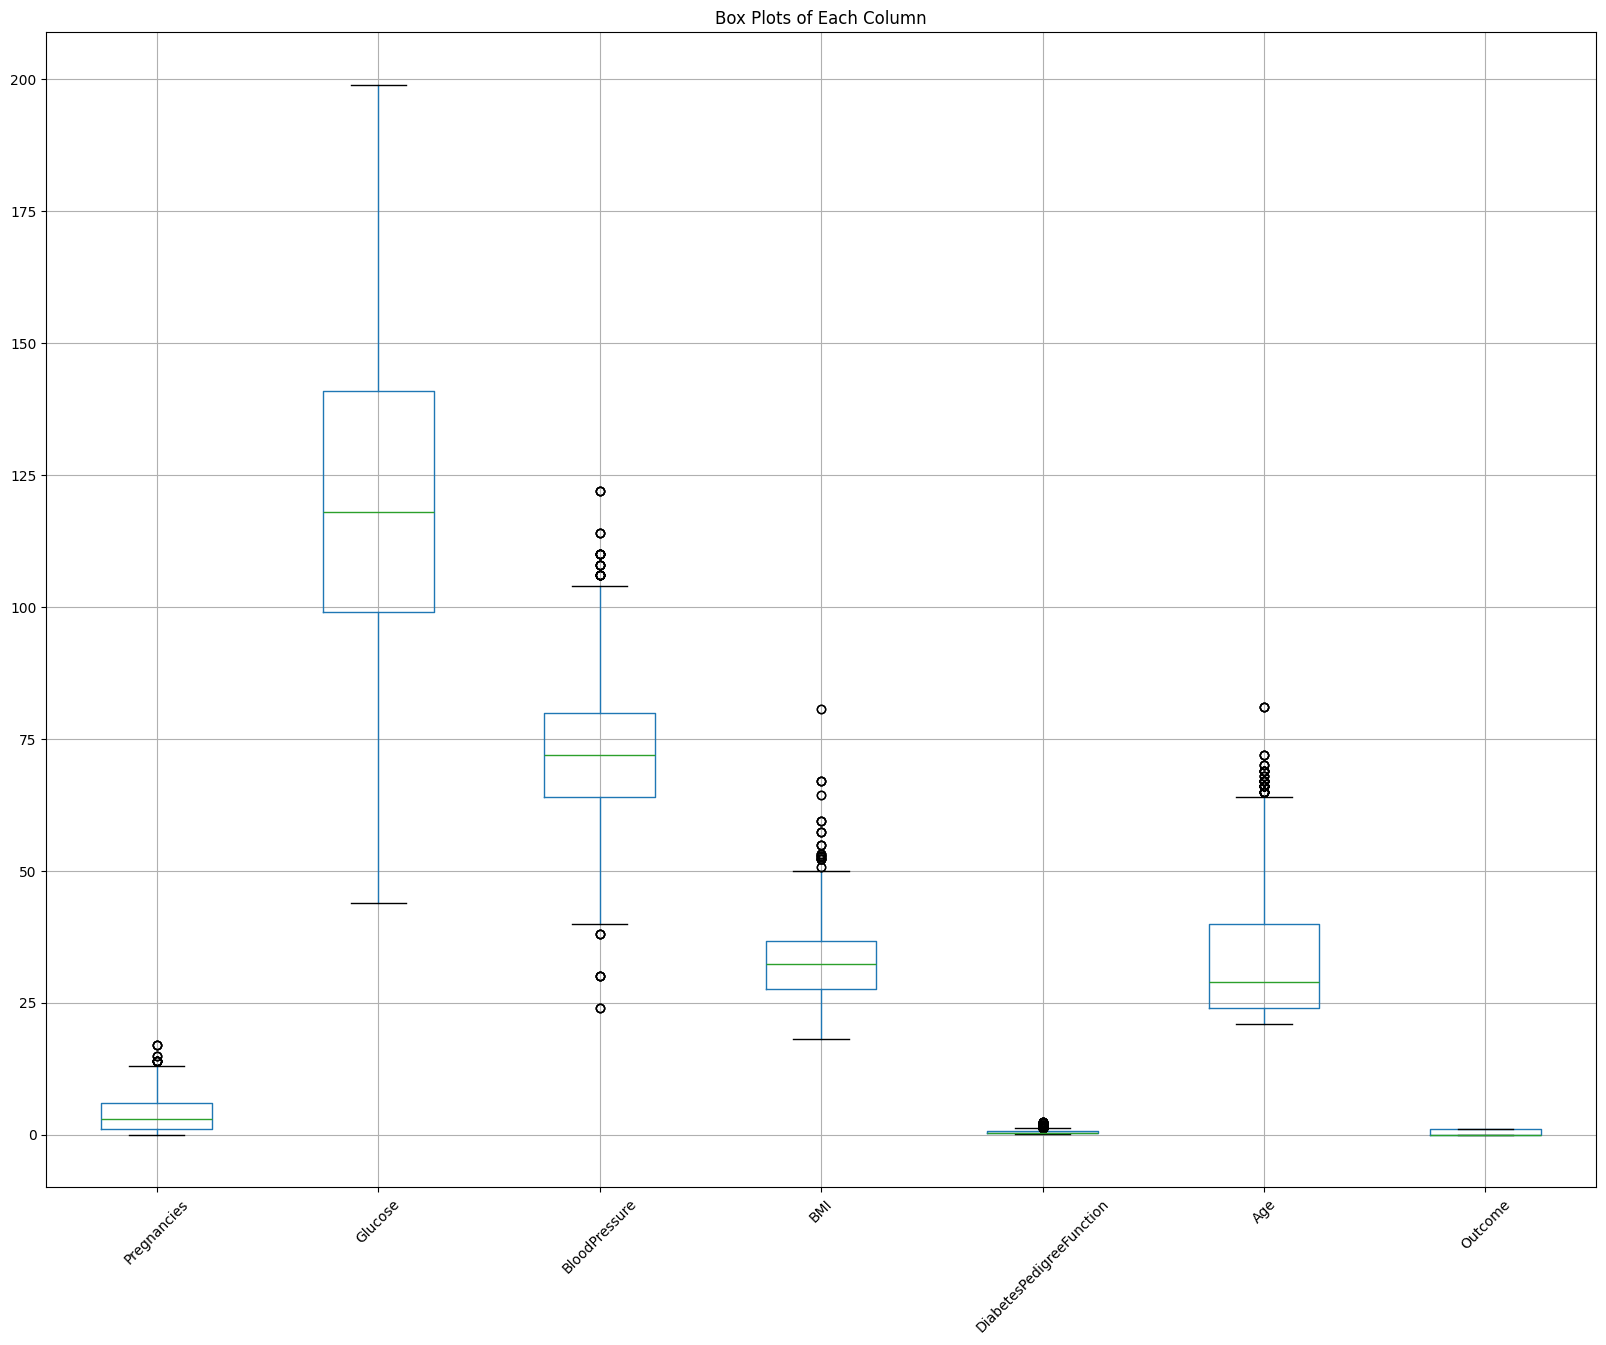

In [5]:
# Histograms for each column
dataset.hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of Each Column')
plt.show()

# Box plots for each column
plt.figure(figsize=(20, 15))
dataset.boxplot()
plt.title('Box Plots of Each Column')
plt.xticks(rotation=45)
plt.show()

###  Scatter Plots

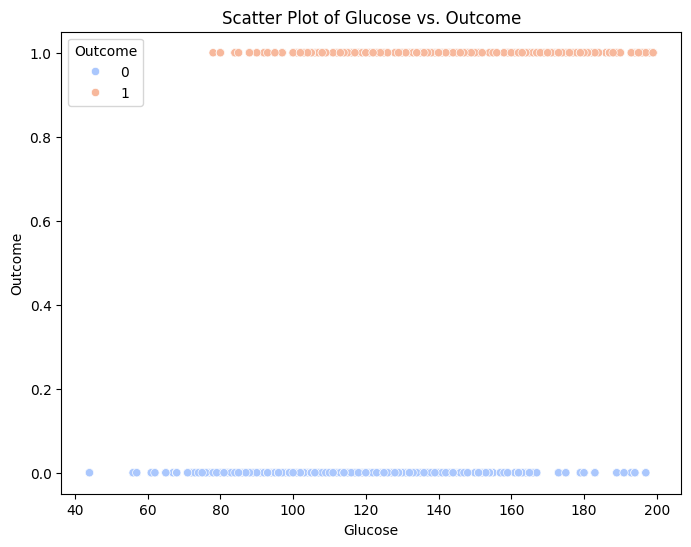

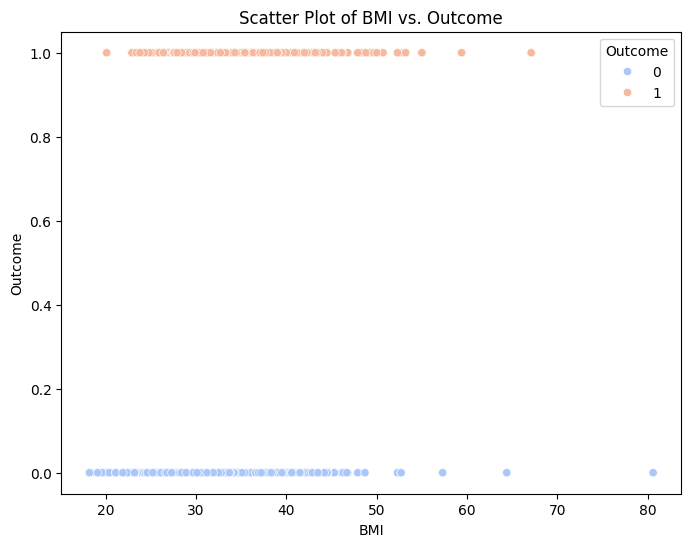

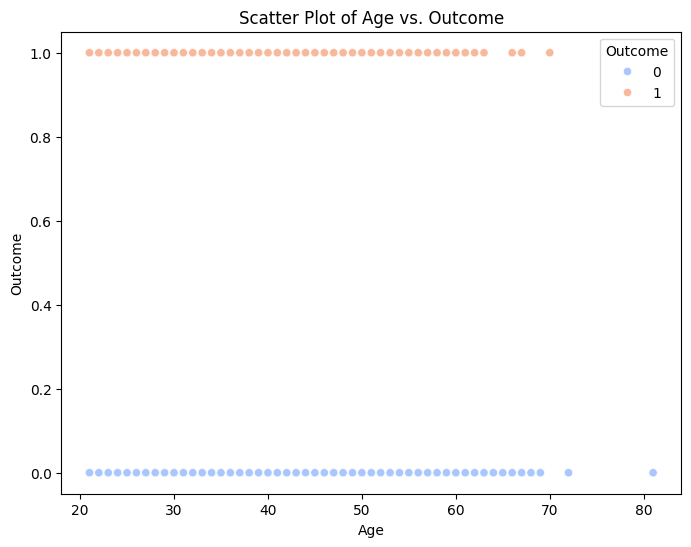

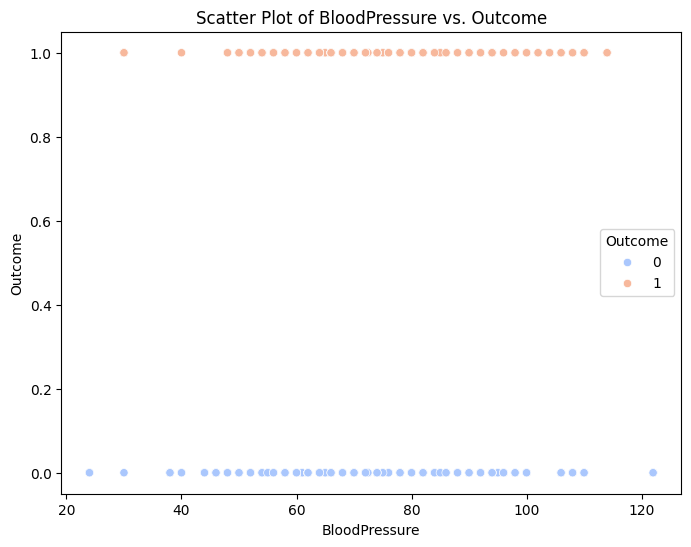

In [6]:
# Scatter plot of Glucose vs. Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='Outcome', data=dataset, hue='Outcome', palette='coolwarm')
plt.title('Scatter Plot of Glucose vs. Outcome')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.show()

# Scatter plot of BMI vs. Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Outcome', data=dataset, hue='Outcome', palette='coolwarm')
plt.title('Scatter Plot of BMI vs. Outcome')
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.show()

# Scatter plot of Age vs. Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Outcome', data=dataset, hue='Outcome', palette='coolwarm')
plt.title('Scatter Plot of Age vs. Outcome')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.show()

# Scatter plot of BloodPressure vs. Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BloodPressure', y='Outcome', data=dataset, hue='Outcome', palette='coolwarm')
plt.title('Scatter Plot of BloodPressure vs. Outcome')
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')
plt.show()


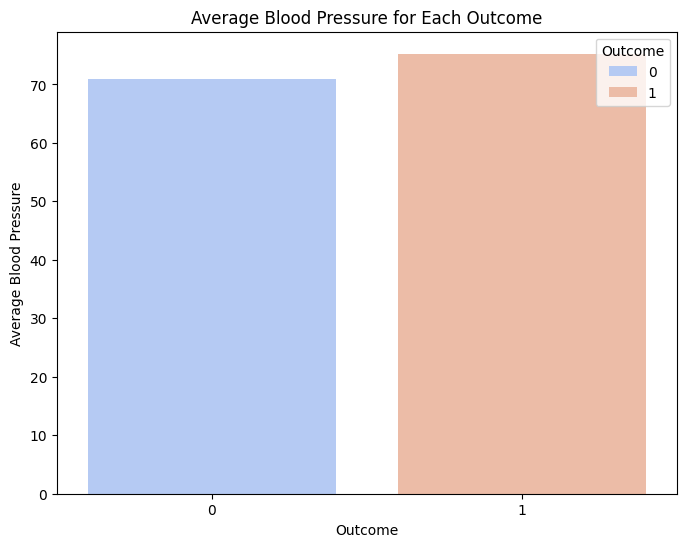

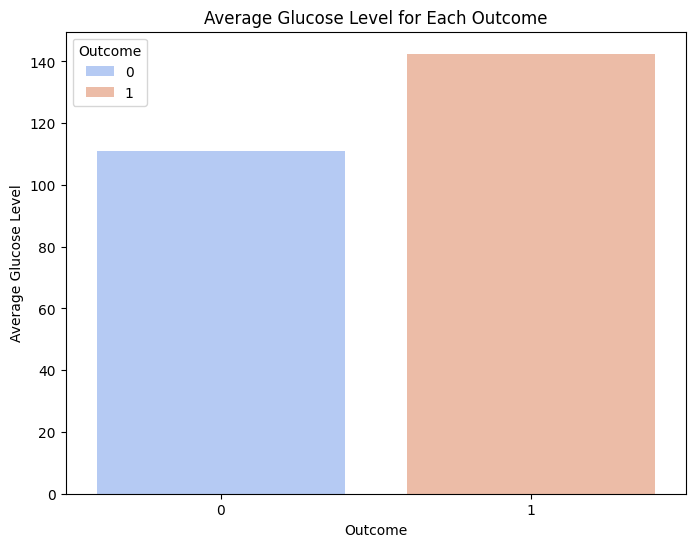

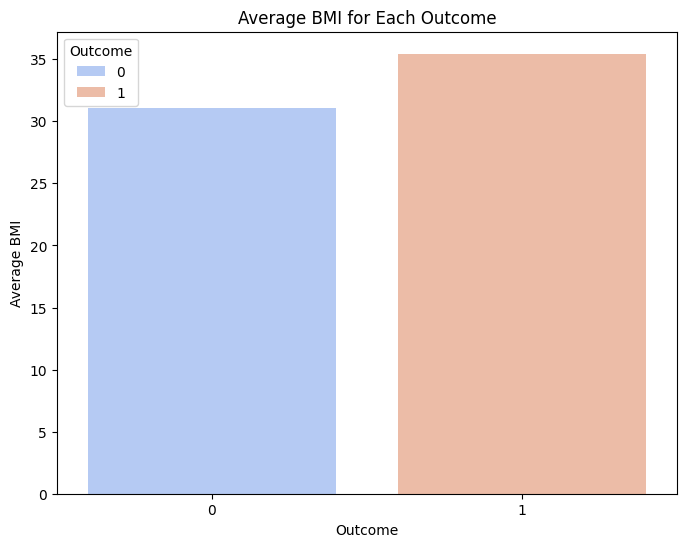

In [7]:
# Calculate the average blood pressure for each outcome
avg_blood_pressure = dataset.groupby('Outcome')['BloodPressure'].mean().reset_index()

# Bar chart of average blood pressure for each outcome
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='BloodPressure', data=avg_blood_pressure, palette='coolwarm', hue='Outcome')
plt.title('Average Blood Pressure for Each Outcome')
plt.xlabel('Outcome')
plt.ylabel('Average Blood Pressure')
plt.show()

# Calculate the average glucose level for each outcome
avg_glucose = dataset.groupby('Outcome')['Glucose'].mean().reset_index()

# Bar chart of average glucose level for each outcome
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Glucose', data=avg_glucose, palette='coolwarm', hue='Outcome')
plt.title('Average Glucose Level for Each Outcome')
plt.xlabel('Outcome')
plt.ylabel('Average Glucose Level')
plt.show()

# Calculate the average BMI for each outcome
avg_bmi = dataset.groupby('Outcome')['BMI'].mean().reset_index()

# Bar chart of average BMI for each outcome
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='BMI', data=avg_bmi, palette='coolwarm', hue='Outcome')
plt.title('Average BMI for Each Outcome')
plt.xlabel('Outcome')
plt.ylabel('Average BMI')
plt.show()





### Logistic Regression Analysis

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


X = dataset[['Glucose', 'BMI']]
y = dataset['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[322  45]
 [ 88  99]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       367
           1       0.69      0.53      0.60       187

    accuracy                           0.76       554
   macro avg       0.74      0.70      0.71       554
weighted avg       0.75      0.76      0.75       554



### Decision Tree Classifier 

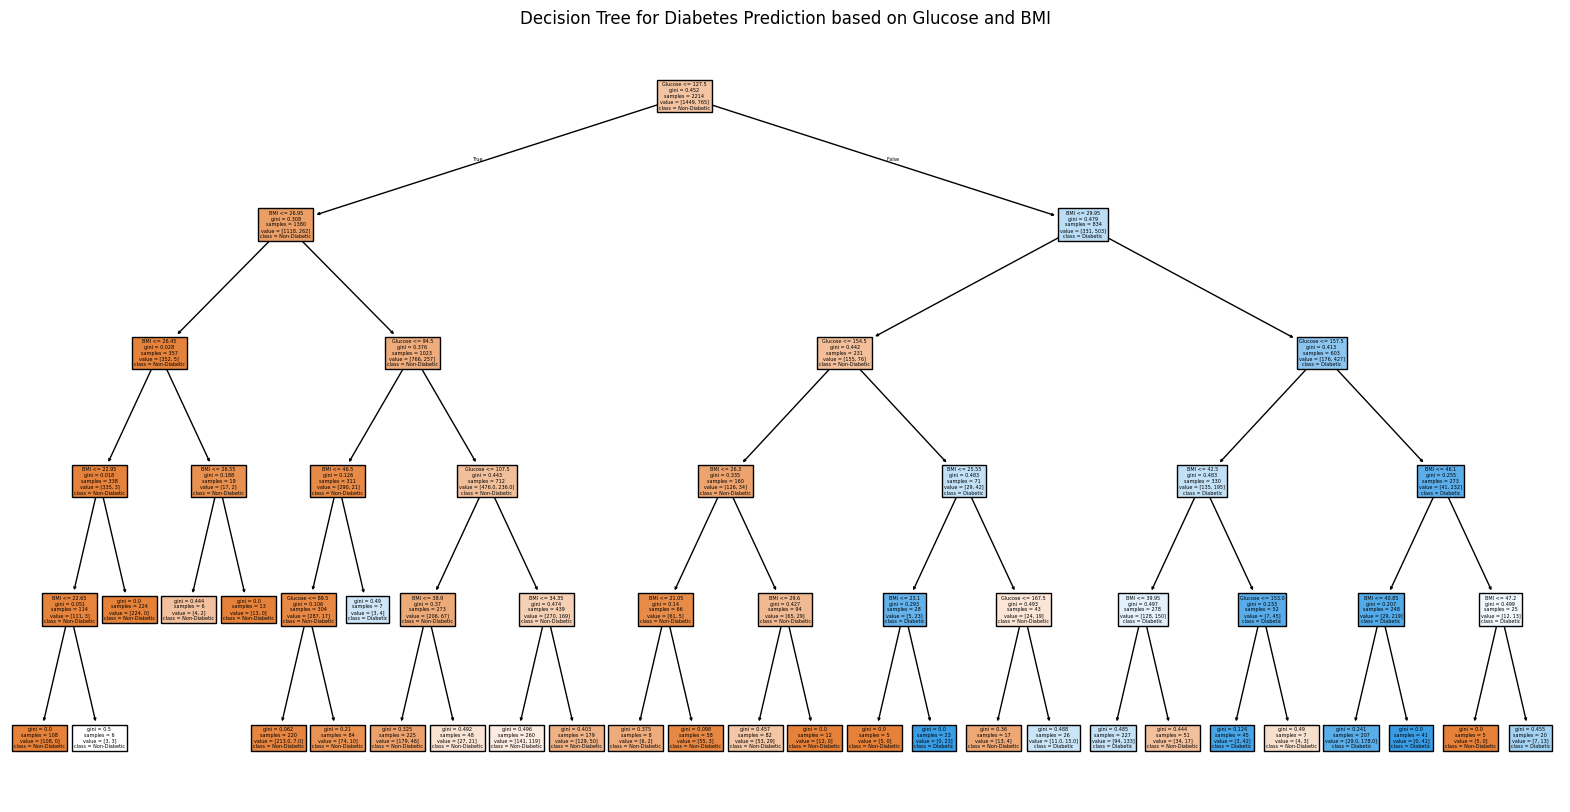

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Create and train the decision tree model
# min samples split = require a minimum number of samples to split an internal node 
# min samples leaf = require a minimum number of samples to be a leaf node - avoids creations for outliers
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=5 , min_samples_split=5 , min_samples_leaf=5)   
tree_clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, feature_names=['Glucose', 'BMI'], class_names=['Non-Diabetic', 'Diabetic'], filled=True)
plt.title('Decision Tree for Diabetes Prediction based on Glucose and BMI')
plt.show()
